In [1]:
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
from langchain_openai import ChatOpenAI

query = 'LLM 모델의 동작 원리는 무엇입니까?'
llm = ChatOpenAI(model='gpt-4o-mini')
llm.invoke(query)

AIMessage(content='대규모 언어 모델(LLM, Large Language Model)은 자연어 처리(NLP)에서 사용되는 인공지능 모델로, 주로 텍스트 데이터를 기반으로 학습하여 언어를 이해하고 생성하는 능력을 갖추고 있습니다. LLM의 동작 원리는 다음과 같은 주요 요소로 설명할 수 있습니다.\n\n1. **데이터 수집과 전처리**: LLM은 대량의 텍스트 데이터를 수집하여 모델 학습에 사용합니다. 이 데이터는 웹사이트, 책, 기사 등 다양한 출처에서 가져오며, 텍스트는 전처리 과정을 통해 정제되고 토큰화(tokenization)됩니다. 토큰화는 문장을 단어, 서브워드 또는 문자 단위로 나누는 과정입니다.\n\n2. **모델 아키텍처**: 대부분의 LLM은 트랜스포머(Transformer) 아키텍처를 기반으로 합니다. 트랜스포머는 자체 주의(attention) 메커니즘을 사용하여 입력 텍스트의 각 단어가 다른 단어와 어떻게 관계되는지를 학습합니다. 이 구조는 병렬 처리가 가능하고, 긴 문맥을 효과적으로 처리할 수 있는 장점이 있습니다.\n\n3. **학습 과정**: LLM은 주로 비지도 학습 방식으로 학습됩니다. 언어 모델링을 통해 다음 단어를 예측하는 방식으로 훈련되며, 이 과정에서 모델은 언어의 구조, 문법, 의미 등을 학습하게 됩니다. 예를 들어, "나는 사과를 먹었다"라는 문장에서 "먹었다"를 예측할 수 있도록 학습합니다.\n\n4. **파인튜닝(Fine-tuning)**: 일반적인 LLM은 특정 작업(예: 질문 답변, 감정 분석 등)에 대한 성능을 높이기 위해 추가적인 파인튜닝 과정을 거칠 수 있습니다. 이 과정에서는 특정 데이터셋을 사용하여 모델을 더욱 구체적인 작업에 맞춰 조정합니다.\n\n5. **텍스트 생성**: 학습이 완료된 LLM은 사용자가 입력한 프롬프트에 따라 텍스트를 생성할 수 있습니다. 모델은 주어진 텍스트의 맥락을 고려하여 다음 단어나 문장을 생성하며, 이를 반복하여 긴 텍스트를 생성할 수도 있습니다.\n\n6. *

In [3]:
# 상태를 먼저 선언
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph.message import add_messages
from langchain_core.messages import AnyMessage #SystemMessage , HumanMessage, AImessage 를 포함하는 class


class AgentState(TypedDict):
    messages: list[Annotated[AnyMessage, add_messages]]

In [4]:
# Graph builder 
from langgraph.graph import StateGraph

graph_builder = StateGraph(AgentState)

In [5]:
# Node 생성
def generate(state: AgentState) -> AgentState:
    """
    `generate` 노드는 사용자의 질문을 받아서 응답을 생성하는 노드.
    """
    messages = state['messages']
    ai_message = llm.invoke(messages)
    return {'messages': [ai_message]}


In [6]:
graph_builder.add_node('generate', generate)

In [7]:
# start , end node 추가
from langgraph.graph import START, END

graph_builder.add_edge(START, 'generate')
graph_builder.add_edge('generate', END)

In [8]:
graph = graph_builder.compile()

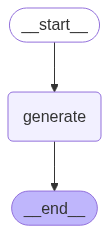

In [13]:
from IPython.display import display, Image
display(Image(graph.get_graph().draw_mermaid_png()))

In [14]:
# invoke 를 해주는 과정
from langchain_core.messages import HumanMessage

initial_state = {'messages': [HumanMessage(query)]}
graph.invoke(initial_state)

{'messages': [AIMessage(content='대형 언어 모델(LLM, Large Language Model)의 동작 원리는 주로 다음과 같은 과정으로 설명할 수 있습니다.\n\n1. **데이터 수집 및 전처리**: LLM은 대량의 텍스트 데이터를 필요로 합니다. 이 데이터는 책, 기사, 웹사이트 등 다양한 출처에서 수집됩니다. 수집된 데이터는 전처리를 통해 불필요한 정보나 노이즈를 제거하고, 모델이 이해할 수 있는 형식으로 변환됩니다.\n\n2. **토큰화(Tokenization)**: 텍스트 데이터를 모델이 처리할 수 있는 형태로 나누는 과정입니다. 예를 들어, 문장을 단어 또는 부분 단어로 나누어 각각의 토큰(token)으로 변환합니다.\n\n3. **모델 아키텍처**: LLM은 주로 트랜스포머(Transformer) 아키텍처를 기반으로 합니다. 이 아키텍처는 셀프 어텐션(self-attention) 메커니즘을 사용하여 입력 데이터의 각 부분 간의 관계를 학습합니다. 이를 통해 모델은 문맥을 이해하고, 단어의 의미를 파악할 수 있습니다.\n\n4. **학습(Training)**: 모델은 주어진 데이터셋을 통해 학습합니다. 주로 언어 모델링(task)이나 전이 학습(transfer learning) 방법을 사용하여 학습하며, 대규모 데이터셋을 통해 패턴, 문법, 의미 등을 학습하게 됩니다. 이 과정에서 손실 함수(loss function)를 최소화하도록 파라미터를 조정합니다.\n\n5. **추론(Inference)**: 학습이 완료된 후, 모델은 새로운 입력 텍스트에 대해 응답을 생성합니다. 주어진 질문이나 명령에 따라 적절한 문장을 생성하며, 이때 모델은 학습한 패턴과 문맥을 기반으로 응답을 만듭니다.\n\n6. **피드백 및 개선**: 모델의 출력을 평가하고, 필요한 경우 추가적인 데이터로 재학습하거나 조정하는 과정을 통해 성능을 개선할 수 있습니다.\n\n이러한 과정을 통해 LLM은 자연어 처리(NLP) 작업을 수행하며, 인간과 비슷한 수